Saved ../nh3_hh_linear_HFref_clipHF.png


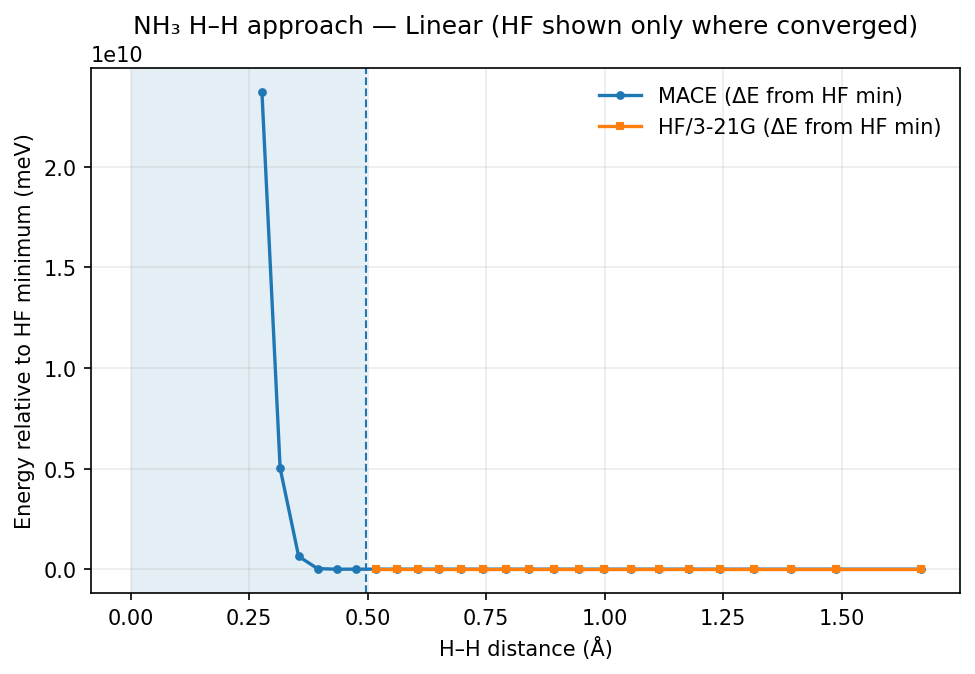

In [1]:
#!/usr/bin/env python3
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# Load
idx = pd.read_csv("../frames_index_and_hh_distance.csv", dtype={"frame_tag": str})
hf  = pd.read_csv("../hf_energies.csv",              dtype={"frame_tag": str})
m   = pd.read_csv("../mace_energies.csv",            dtype={"frame_tag": str})
for df in (idx, hf, m): df["frame_tag"] = df["frame_tag"].astype(str).str.zfill(4)

# Join
df = idx.merge(hf[["frame_tag","energy_hartree"]], on="frame_tag", how="left")
df = df.merge(m[["frame_tag","energy_eV"]],         on="frame_tag", how="left")

# Convert → meV
Ha_to_meV = 27211.386245988
df["HF_meV"]   = df["energy_hartree"] * Ha_to_meV
df["MACE_meV"] = df["energy_eV"]     * 1000.0


hf_min = np.nanmin(df["HF_meV"])
df["HF_rel"]   = df["HF_meV"]   - hf_min
df["MACE_rel"] = df["MACE_meV"] - hf_min

# Sort by distance
df = df.sort_values("hh_distance_A")

# HF fail threshold (shaded region)
R_COV_H = 0.31
fail = 0.8 * 2 * R_COV_H 

# Mask HF to converged only 
ok_hf = np.isfinite(df["HF_rel"])

plt.figure(figsize=(6.6,4.6), dpi=150)

# Shaded zone + threshold line
plt.axvspan(0, fail, alpha=0.12)
plt.axvline(fail, ls="--", lw=1.0)

# MACE across the whole domain
plt.plot(df["hh_distance_A"], df["MACE_rel"], marker="o", ms=3.2, lw=1.6, label="MACE (ΔE from HF min)")

# HF only where converged (gaps elsewhere)
plt.plot(df.loc[ok_hf, "hh_distance_A"], df.loc[ok_hf, "HF_rel"],
         marker="s", ms=3.2, lw=1.6, label="HF/3-21G (ΔE from HF min)")

plt.xlabel("H–H distance (Å)")
plt.ylabel("Energy relative to HF minimum (meV)")
plt.title("NH₃ H–H approach — Linear (HF shown only where converged)")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("../nh3_hh_linear_HFref_clipHF.png", dpi=600, bbox_inches="tight")
print("Saved ../nh3_hh_linear_HFref_clipHF.png")

